In [1]:
from sklearn.datasets import make_moons
m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

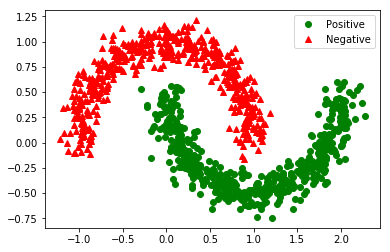

In [3]:
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], 'go', label='Positive')
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], 'r^', label='Negative')
plt.legend()
plt.show()

In [4]:
X_moons_with_bias =np.c_[np.ones((m,1)), X_moons]
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [5]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons_with_bias, y_moons_column_vector,
                                                    test_size=0.2, random_state=42)

In [9]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    return X_train[rnd_indices], y_train[rnd_indices]

In [10]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [11]:
import tensorflow as tf

In [12]:
reset_graph()

In [13]:
n_input = 2
X = tf.placeholder(tf.float32, shape=(None, n_input+1), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')
theta = tf.Variable(tf.random_uniform([n_input+1, 1], -1.0, 1.0, seed=42), name='theta')
logits = tf.matmul(X, theta, name='logits')
y_proba = 1 / (1+tf.exp(-logits))

In [15]:
y_proba = tf.sigmoid(logits)

In [16]:
eplison = 1e-7
loss = - tf.reduce_mean(y*tf.log(y_proba+eplison)+(1-y)*tf.log(1-y_proba+eplison))

In [17]:
loss = tf.losses.log_loss(y, y_proba)

In [18]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [19]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m/batch_size))
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        loss_val = loss.eval({X:X_test,y:y_test})
        if epoch % 100 == 0:
            print("epoch", epoch, '\tloss', loss_val)
    y_proba_val = y_proba.eval(feed_dict={X:X_test, y:y_test})

epoch 0 	loss 0.794687
epoch 100 	loss 0.345553
epoch 200 	loss 0.304337
epoch 300 	loss 0.285157
epoch 400 	loss 0.273955
epoch 500 	loss 0.266724
epoch 600 	loss 0.262019
epoch 700 	loss 0.258824
epoch 800 	loss 0.256261
epoch 900 	loss 0.254848


In [20]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [False],
       [ True],
       [False],
       [ True]], dtype=bool)

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

0.86538461538461542

In [22]:
recall_score(y_test, y_pred)

0.90000000000000002

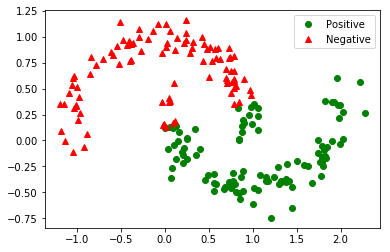

In [23]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()